# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

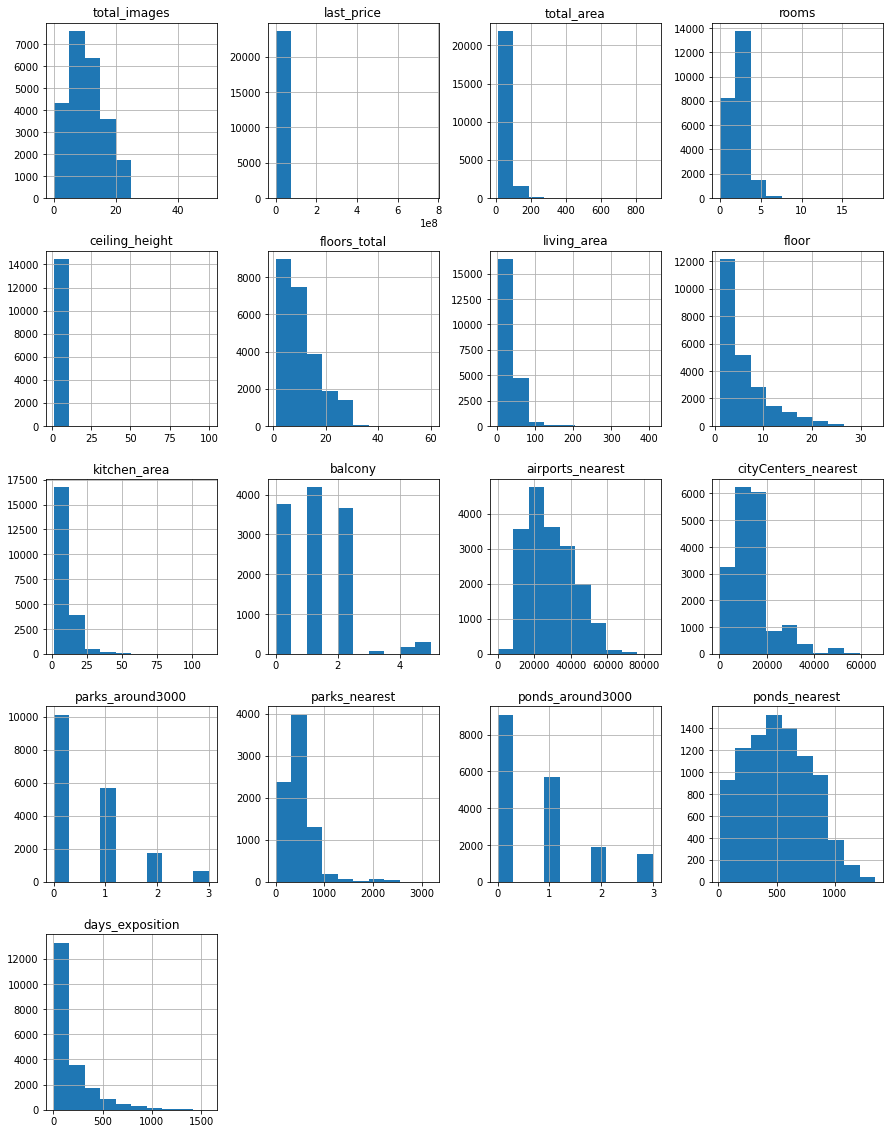

In [1]:
#импортируем нужные библиотеки и выводим оющую информацию о файле, с которым будем работать
import pandas as pd
import matplotlib as pl

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')   #разделение по \t

#выводим первые строчки data
print(data.head())

#выводим информацию о датафрейме
data.info()

#строим гистограмму по всем данным
data.hist(figsize = (15,20))

После того, как мы скачали датасет и вывели о нем общую информацию, видно, что в данных много пропусков в таких строках, как (ponds_nearest, parks_nearest, kitchen_area, living_area, ceiling_height, и. т. д.

Есть 2 варианта пропусков в данной ситуации:
  1) В ячейках, где у нас содержится информация о наличии/отсутсвии например отдельной кухни или наличие поблизости к квартире парка, из-за их отсутствия, поэтому нужно скорректировать данные и вместо пропуска поставить значение "0".
  2) В таких ячейках, как например ceiling_height (высота потолков) вероятно просто пропустили значение, когда заполняли данные. Ведь квартира не может быть с высотой потолков 0 см :) Здесь можно заполнить значение средним mean() среди всех значений ceiling_height.


После рассмотрения графиков, можно заметить, что в некоторых значениях есть существенные выбросы, с которыми необходимо поработать. К примеру, несколько квартир продавались почти 1500 дней, то есть около 5 лет - странная ситуация, нужно разобраться.

### Предобработка данных

In [2]:
#Начнем с обработки пропусков в данных

#подсчет количества пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски почти в каждом значении, будем обрабатывать по порядку

# ceiling_height

In [3]:
#ceiling_height
#print(data['ceiling_height'].head(15))


#получаем среднее значение высота потолков, им и заполним
#ceiling_mean = data['ceiling_height'].mean()

#выводим все уникальные значения из этого столбца
#data['ceiling_height'].sort_values(ascending = True).unique()





#data.ceiling_height.sort_values(ascending=False)
#уберем высоту 6 - 24 метров и до 100 чтобы было / 10 и получим 2.3, 2.4, 2.5
data = data.loc[(data['ceiling_height'] < 6)|((data['ceiling_height'] >=24)&(data['ceiling_height'] != 100)) | data['ceiling_height'].isna()] 
# data.ceiling_height.sort_values(ascending=False)

data.loc[data['ceiling_height'] > 23, 'ceiling_height'] = data['ceiling_height']/10

#data.plot(y='ceiling_height',kind='hist', bins = 100, range=(0,5))

data.head()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В высоте потолков есть много значений, где потолки выше 5 метров, даже достигают 100 метров, эти значения мы уберем (тк таких потолков не бывает) и заменим их на среднюю высоту потолков среди всех значений.


  *Возможная причина пропуска или ошибки:* вероятнее всего человеческий фактор и просто ошибки произошли из-за невнимательности или недобросовестности ареднодателя, заполнявшего документы. Возможны и другие расклады, связанные с технической составляющей (ошибка при переносе данных из таблицы в таблицуБ неправильный формат данных), это все будет видно дальше. 

In [4]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

С потолками мы разобрались, убрали аномальные значения, привели их к средним значениям, убрали пропуски.

# floors_total

In [5]:
#проверяем значения
print(data['floors_total'].sort_values(ascending= True).unique())


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.
 nan]


  *Возможная причина пропуска:* это простой параметр, который не всегда решает главную роль при покупе/аренде квартиры или помещения, тк обычно на сайтах, таких как "Циан", есть вкладка со сведениями о доме, где и указана полная информация с необходимы документами о проекте здания/жилого дома, устройстве, и т.д..

In [6]:
data = data.dropna(subset=['floors_total'])

Удалим данные значения, так как дальше будет возникать проблема при изменении типов

<AxesSubplot:>

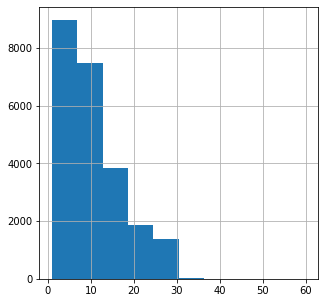

In [7]:
data['floors_total'].hist(figsize = (5,5))

In [8]:
data['floors_total'].isna().sum()

0

AxesSubplot(0.125,0.125;0.775x0.755)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.]


(23603, 22)

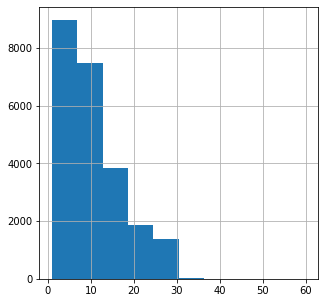

In [9]:
#заменяем значение для неправильной высоты (2,3) и удаляем
#data.loc[data['floors_total'] == 2.3] = 2
#data = data.dropna(subset = ['floors_total'])


#выведем график для проверки значений
print(data['floors_total'].hist(figsize = (5,5)))


#проверим уникальные значения этажей
print(data['floors_total'].sort_values(ascending = True).unique())
#print(data['floors_total'].isna().sum())
#print(data.shape)
#data = data.dropna(subset=['floors_total'])
data.shape

Итак, пропуски мы удалили, а неправильные значения заменили на адекватные.

# living_area

In [10]:
#выведем информацию об столбце living_area
data['living_area'].head(20)

0     51.00
1     18.60
2     34.30
3       NaN
4     32.00
5     14.40
6     10.60
7       NaN
8     15.43
9     43.60
10    20.30
11    31.00
12    30.00
13    27.00
14    17.00
15    20.50
16    55.60
17    16.50
18    19.40
19    76.00
Name: living_area, dtype: float64

Очень странно, что тут имеются пропуски (причем очень много), хотя это обычно один из самых важных парамеьров при выборе квартиры. Попробуем дальше с этим разобраться

  *Возможная причина пропуска:* тут непонятно по какой причне присутствуют пропуски в данных, не думаю, что их просто забыли внести. Может произошла ошибка при переносе данных, хотя с типом данных все в порядке. Будем смотреть дальше.

# is_apartment

In [11]:
print(data['is_apartment'].unique())

[nan False True]


У этой ячейки булев тип, но это и совсем не важный параметр, на который обращается меньше всего внимания арендаторами/покупателями. Поэтому эти значения пока мы трогать не будем

  *Возможная причина пропуска:* скорее всего так как это не самый важный параметр, то его просто решили пропустить при заполнении. Или они не являются апартаментами, поэтому их и не отмечали, решили пропустить.

In [12]:
#data = data.dropna(subset=['is_apartment'])
data.loc[data['is_apartment'].isna(),'is_apartment'] = False
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [13]:
print(data['is_apartment'].unique())

[False True]


In [14]:
data.shape[0]/23000*100

102.62173913043478

# kitchen_area

In [15]:
print(data['kitchen_area'].isna().sum())
print(data['kitchen_area'].isna().count())

2229
23603


Природа этих пропусков не особо мне понятна и не особо ясно, почему появилось так много пропусков, может проблема обнаружится дальше, пока эти данные мы не трогаем.

Дополнение: это тоже не особо важный параметр, который можно пропустить. При аренде квартиры зачастую показывается план жилого помещения, на котором схематично обозначена площадь каждой комнаты, поэтому kitchen_area можно пропустить


# balcony

In [16]:
print(data['balcony'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5. nan]


В данном случае там, где пропуски скорее всего квартры то и нет в целом, поэтому здесь поставим значение равное нулю.

In [17]:
#заменяем пропуски на 0
data['balcony'] = data['balcony'].fillna(value = 0)

#проверяем правильность вывода данных
print(data['balcony'].sort_values().unique())
data.isna().sum()

[0. 1. 2. 3. 4. 5.]


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2229
balcony                     0
locality_name              48
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15563
ponds_around3000         5507
ponds_nearest           14546
days_exposition          3171
dtype: int64

Итак, в балконах мы пропуски убрали и оставили только нормальные значения.

# locality_name

In [18]:
#общая информация о data
print(data.info())

#общее кол-во пропусков
print(data['locality_name'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23603 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23603 non-null  int64  
 1   last_price            23603 non-null  float64
 2   total_area            23603 non-null  float64
 3   first_day_exposition  23603 non-null  object 
 4   rooms                 23603 non-null  int64  
 5   ceiling_height        23603 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           21733 non-null  float64
 8   floor                 23603 non-null  int64  
 9   is_apartment          23603 non-null  object 
 10  studio                23603 non-null  bool   
 11  open_plan             23603 non-null  bool   
 12  kitchen_area          21374 non-null  float64
 13  balcony               23603 non-null  float64
 14  locality_name         23555 non-null  object 
 15  airports_nearest   

Тут непонятна причина возникновения пропуска, так как населенный пункт - это основной параметр при выборе места жительства. Природа пропуска непонятна, трогать его не будем и на другое значение мы его заменить тоже не можем, так как это не количественный тип.

In [19]:
#print(data.shape)
#data = data.dropna(subset=['locality_name'])
#data.shape
data.shape

(23603, 22)

In [20]:
data = data.dropna(subset=['locality_name'])
data.shape

(23555, 22)

# airports_nearest

In [21]:
# выводим все уникальные значения расстояний до ближайшего аэропорта
print(data['airports_nearest'].unique())
print(data['airports_nearest'].head(20))

[18863. 12817. 21741. ... 11751. 20151. 24665.]
0     18863.0
1     12817.0
2     21741.0
3     28098.0
4     31856.0
5         NaN
6     52996.0
7     23982.0
8         NaN
9     50898.0
10    38357.0
11    48252.0
12        NaN
13    37868.0
14    20782.0
15    12900.0
16    22108.0
17    33564.0
18    44060.0
19    38900.0
Name: airports_nearest, dtype: float64


Здесь ситуация следующая: не совсем ясно, какая природа этих значений. Я думаю, что скорее всего расстояние указано в метрах, то есть самое маленькое расстояние = 18.863 м, то есть 18.5 км, что очень похоже на правду. 

   *Возможная причина возникнвения пропусков:* видимо, что значения пропущены там, где расстояние настолько большое до аэропорта, что нет смысла вообще его даже указывать.
   
   Эти пропуски мы пропустим.

 # cityCenters_nearest

5500
[16028. 18603. 13933. ... 27977.  7262.  6263.]
AxesSubplot(0.125,0.125;0.775x0.755)


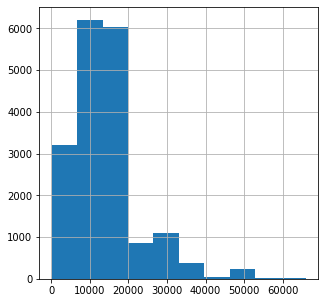

In [22]:
#проверим кол-во пропусков и уникальные значения выведенные по возрастанию
print(data['cityCenters_nearest'].isna().sum())
print(data['cityCenters_nearest'].unique())

#попробуем построить гистограмму
print(data['cityCenters_nearest'].hist(figsize = (5,5)))

#print(data['cityCenters_nearest'].plot(kind = 'bar'))

Здесь с данными все в порядке, выбросов видимых нет (ну по крайней мере их не видно ни на одном из графиков), поэтому за эти данные можно быть спокойными.

# parks_around3000

In [23]:
#выведем кол-во пропусков и уникальные значения
print(data['parks_around3000'].isna().sum())


#уникальные значения данных ячеек
print(data['parks_around3000'].sort_values().unique())


5499
[ 0.  1.  2.  3. nan]


После вывода мы увидели, что здесь есть очень много пропусков, которые скорее всего случились потому, что поблизости этих домов, а именно в пределах 3 км, просто не существует парков, поэтому данные значения были пропущены.


Их можно заменить на нули, то есть парка поблизости нет.

In [24]:
#заполняем пропуски на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value = 0)

#проверка
print(data['parks_around3000'].sort_values().unique())
print(data['parks_around3000'].isna().sum())
data.dtypes

[0. 1. 2. 3.]
0


total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Избавились от пропусков и заменили их на нули

In [25]:
#проверка оставшихся ячеек с пропусками
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2220
balcony                     0
locality_name               0
airports_nearest         5523
cityCenters_nearest      5500
parks_around3000            0
parks_nearest           15530
ponds_around3000         5499
ponds_nearest           14523
days_exposition          3170
dtype: int64


# parks_nearest

0
AxesSubplot(0.125,0.125;0.775x0.755)
[0.000e+00 1.000e+00 3.000e+00 4.000e+00 7.000e+00 9.000e+00 1.000e+01
 1.100e+01 1.200e+01 1.300e+01 1.400e+01 1.500e+01 1.600e+01 1.700e+01
 1.800e+01 1.900e+01 2.000e+01 2.100e+01 2.200e+01 2.300e+01 2.400e+01
 2.700e+01 2.800e+01 3.000e+01 3.200e+01 3.300e+01 3.400e+01 3.500e+01
 3.600e+01 3.700e+01 3.800e+01 3.900e+01 4.000e+01 4.100e+01 4.200e+01
 4.300e+01 4.400e+01 4.500e+01 4.600e+01 4.700e+01 4.800e+01 4.900e+01
 5.000e+01 5.100e+01 5.200e+01 5.300e+01 5.400e+01 5.500e+01 5.600e+01
 5.700e+01 5.800e+01 5.900e+01 6.000e+01 6.100e+01 6.200e+01 6.300e+01
 6.400e+01 6.500e+01 6.600e+01 6.800e+01 6.900e+01 7.100e+01 7.200e+01
 7.300e+01 7.400e+01 7.500e+01 7.600e+01 7.700e+01 7.800e+01 8.000e+01
 8.100e+01 8.200e+01 8.300e+01 8.400e+01 8.500e+01 8.600e+01 8.700e+01
 8.800e+01 9.000e+01 9.100e+01 9.200e+01 9.300e+01 9.400e+01 9.500e+01
 9.600e+01 9.700e+01 9.800e+01 9.900e+01 1.000e+02 1.010e+02 1.020e+02
 1.030e+02 1.040e+02 1.050e+02 1.060e+

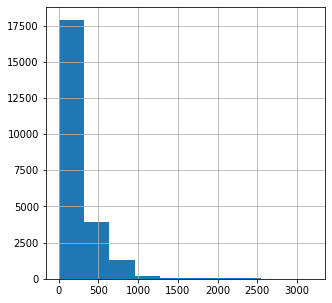

In [26]:
#ищем количество пропусков
data['parks_nearest'] = data['parks_nearest'].fillna(value = 0)
print(data['parks_nearest'].isna().sum())

#гистограмма для ообычных значений
print(data['parks_nearest'].hist(figsize = (5,5)))

#график для уникальных значений
#print(data['parks_nearest'].plot())


#вывод уникальных значений на экран
print(data['parks_nearest'].sort_values().unique())

#тут не особо понятно было, попробую вывести head()
print(data['parks_nearest'].sort_values(ascending = False).head(20))

После вывода графика, можно заметить, что выбросы отсутствуют (например, парк в 3 км от дома - норма).
Незаполненных данных не имеется

# ponds_around3000

In [27]:
#выведем первые строки
#print(data['ponds_around3000'].head(20))

#выведем список, а затем гистограмму всех уникальных значений этого столбца
#print(data['ponds_around3000'].sort_values(ascending = True).unique())

#заменим пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = 0)

#проверим еще раз вывод
print(data['ponds_around3000'].sort_values(ascending = True).unique())
print(data['ponds_around3000'].head(20))

[0. 1. 2. 3.]
0     2.0
1     0.0
2     2.0
3     3.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    2.0
11    0.0
12    0.0
13    3.0
14    1.0
15    1.0
16    0.0
17    1.0
18    0.0
19    0.0
Name: ponds_around3000, dtype: float64


Тут нет аномальных значений, максимальное число водоемов в пределах 3 км - 4. В СПб такая ситуация возможна, если жить на Петроградке к примеру))

# ponds_nearest

In [28]:
#выведем первые строки
#print(data['ponds_nearest'].head(20))

#выведем список, а затем гистограмму всех уникальных значений этого столбца
#print(data['ponds_nearest'].sort_values(ascending = True).unique())

#заменим пропущенные значения на 0
data['ponds_nearest'] = data['ponds_nearest'].fillna(value = 0)

#проверим еще раз вывод
print(data['ponds_nearest'].sort_values(ascending = True).unique())
print(data['ponds_nearest'].head(20))

[   0.   13.   16. ... 1337. 1341. 1344.]
0     755.0
1       0.0
2     574.0
3     234.0
4      48.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10    553.0
11      0.0
12      0.0
13    298.0
14     96.0
15    296.0
16      0.0
17    859.0
18      0.0
19      0.0
Name: ponds_nearest, dtype: float64


В этих значениях нет выбросов, тут все в порядке. Даже при максимальном значении в 1344м - такое может быть.

# days_exposition

In [29]:
#выведем head таблицу с days_exposition
print(data['days_exposition'].head(20))

#выведем уникальные значения (отсортированные)
print(data['days_exposition'].sort_values().unique())

#посмотрим мин и макс значение 
print(data['days_exposition'].min(), data['days_exposition'].max())

0       NaN
1      81.0
2     558.0
3     424.0
4     121.0
5      55.0
6     155.0
7       NaN
8     189.0
9     289.0
10    137.0
11      7.0
12     90.0
13    366.0
14    203.0
15     19.0
16    397.0
17    571.0
18    168.0
19     97.0
Name: days_exposition, dtype: float64
[1.000e+00 2.000e+00 3.000e+00 ... 1.572e+03 1.580e+03       nan]
1.0 1580.0


0 м. - минимальное и 1580 м. - максимальное значения, очень странные последние значения, что квартиры сдавались больше года. Вероятно, объявления попросту не были сняты с продажи, так и висели несколько лет. Допустим, что такое возможно.

# Итог обработки пропусков

По итогу можно сказать, что те пропуски, которые можно было обработать - были обработаны. Какие-то неоднозначные значения были оставлены как есть, либо заменены на 0. 

# Замена типов данных

In [30]:
#выведем информацию о датафрейме
print(data.dtypes)
print(data.head())
#print(data['is_apartment'].unique())

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2  

Поменять тип данных можно в:
- total_images  (float64 -> int)          - кол-во фотографий это целочисленное число.
- first_day_exposition  (object -> dtime) - нам нужен правильный формат времени, а не строка с разделителями
- rooms  (float64 -> int)                 - не может быть полторы комнаты в квартире.
- floors_total  (float64 -> int)          - не может быть 5.5 этажей.
- floor  (float64 -> int)                 - квартира не может находиться на 2,5-ой этаже.
- is_apartament  (object -> bool)         - да/нет.
- studio  (object -> bool)                - да/нет.
- open_plan  (object -> bool)             - да/нет.
- balcony  (float64 -> int)               - не может быть полтора или два с половиной балкона в квартире.
- parks_around3000  (float64 -> int)      - не может быть 3 с половиной парка поблизости.
- ponds_around3000  (float64 -> int)      - не может быть 4 с половиной водоема поблизости.

In [31]:
#заменяем тип данных
data['total_images'] = data['total_images'].astype(int)
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['rooms'] = data['rooms'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['floor'] = data['floor'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['studio'] = data['studio'].astype(bool)
data['open_plan'] = data['open_plan'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)


#проверка изменения типов
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Все изменения получились, типы были поменяны

# Устранение дубликатов

In [32]:
#попробуем найти явные дубликаты
data[data.duplicated()].shape

(0, 22)

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Исходя из этих данных, можно понять, что неявные дубликаты находятся в "locality_name" - будем с ними работать.

In [34]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Дубликаты находятся в таких названиях, как "поселок городского типа", "поселок",и т.д. - уберем их.
Поменяем также городской поселек на поселок городского типа

In [35]:
#в данных есть два странных значения, которые не получается убрать, - это 4 и 2. Попробую убрать их вручную
#data.loc[data['locality_name'] == 2 | data['locality_name'] == 4] = 'пусто'
#data.loc[data['locality_name'] == 2] = ''
#data.loc[data['locality_name'] == 4] = ''

In [36]:
#напишем функцию, которая будет заменять строки-дубликаты
def change_name(data, what, for_what):
    return data.replace(what, for_what)

#применяем функцию
data['locality_name'] = data['locality_name'].apply(change_name, args=('поселок ', 'посёлок '))
data['locality_name'] = data['locality_name'].apply(change_name, args=('городской посёлок ', 'посёлок городского типа '))
data['locality_name'] = data['locality_name'].apply(change_name, args=('посёлок городского типа ', 'посёлок '))


#print(data[data.duplicated()].shape)
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
3            2.65            14          NaN      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0        0  Санкт-Петербург           18863.0   
1 

# Устранение выбросов

AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:>

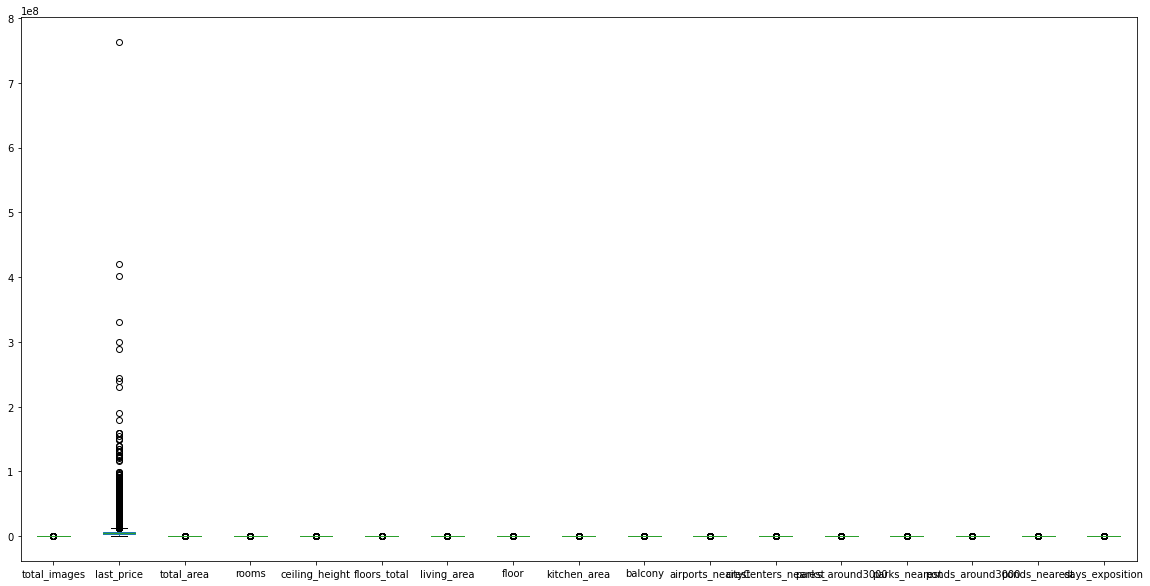

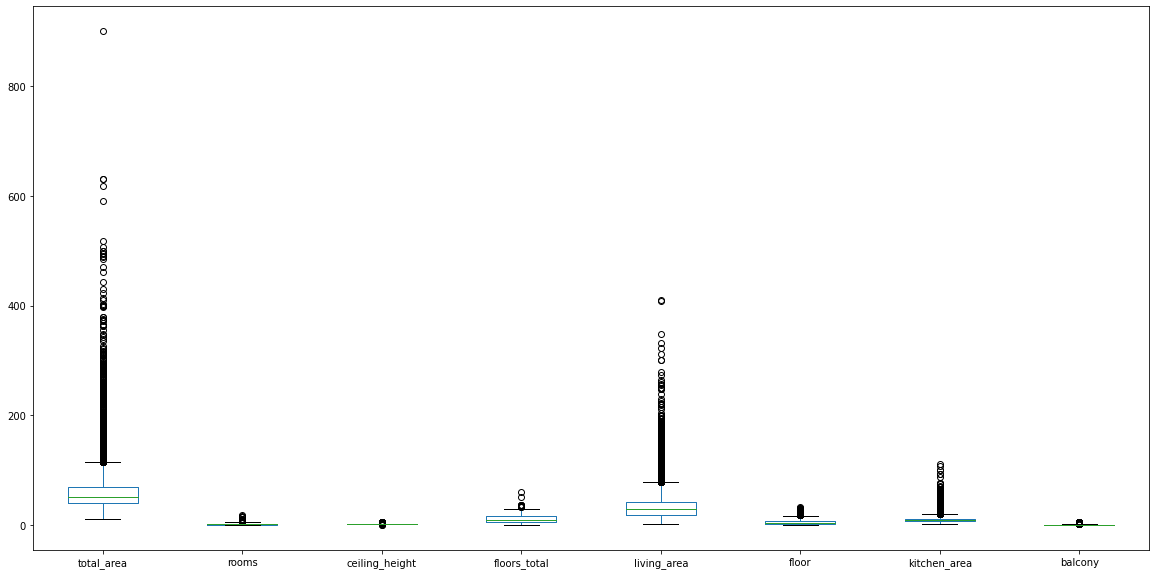

In [37]:
#выведем ящик с усами для просмотра выбросов
print(data.plot(kind = 'box', figsize = (20,10)))
#на первом графике плохо видно все выбросы, будем смотреть по срезам данных
data.loc[:,'total_area':'balcony'].plot(kind='box', figsize=(20,10))

#print(data['last_price'].unique().plot())


Выбросы видны почти везде, особенно в total_area, living_area, kitchen_area - попробуем рассмотреть их более детально и изменить

In [38]:
print(data['total_area'].sort_values())
data['living_area'].sort_values().unique()

19904     12.0
17961     13.0
19807     13.0
19546     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23555, dtype: float64


array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [39]:
print(data['total_area'].quantile(.25))
print(data['total_area'].quantile(.75))
data['total_area'].max()

40.0
69.7


900.0

In [40]:
print(data['rooms'].quantile(.25))
print(data['rooms'].quantile(.75))
data['rooms'].max()

1.0
3.0


19

In [41]:
#Судя по данным, выбросы будем приравнивать к .75 квартилю, так как эти выбросы слишком нереалистичные

In [42]:
#напишем цикл, который будет перебирать столбцы и заменять "верхние" и "нижние" выбросы
data_columns = data.describe().columns
print(data_columns)


#for col in data_columns:
#    #берем квантили
#    qua_1 = data[col].quantile(.25)
#    qua_3 = data[col].quantile(.75)
#    #заменяем на границу
#    data.loc[data[col] < qua_1, col] = qua_1
#    data.loc[data[col] > qua_3, col] = qua_3


for col in data_columns:
    #берем квантили
    qua_1 = data[col].quantile(.25)
    qua_3 = data[col].quantile(.75)
    diff = qua_3 - qua_1    
    #заменяем на границу
    bound_lower = max(0, qua_1 - diff*1.5) # тк разница между .25 и .75 - 50, поэтому diff * 1.5  
    # data['total_area'] - например 40(.25) - 29(diff)* 1.5 = -3, поэтому нижняя граница будет браться из max()
    bound_upper = diff*1.5 + qua_3 
    data.loc[data[col] < bound_lower, col] = bound_lower
    data.loc[data[col] > bound_upper, col] = bound_upper


Index(['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
       'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')


Странно, попробовал сперва написать data.columns и напечатало такой же список колонок, как и при data.describe().columns, но в первом случае дальнейших цикл выдавал ошибку.

! Переделал цикл на тот, который под закомментированным, так как при принте графиков был ужас, - все значения были от 25 до 75, сперва не учел, что так получится

In [43]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,19.5,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,510.0
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,2.5,234.0,424.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,19.5,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<AxesSubplot:>

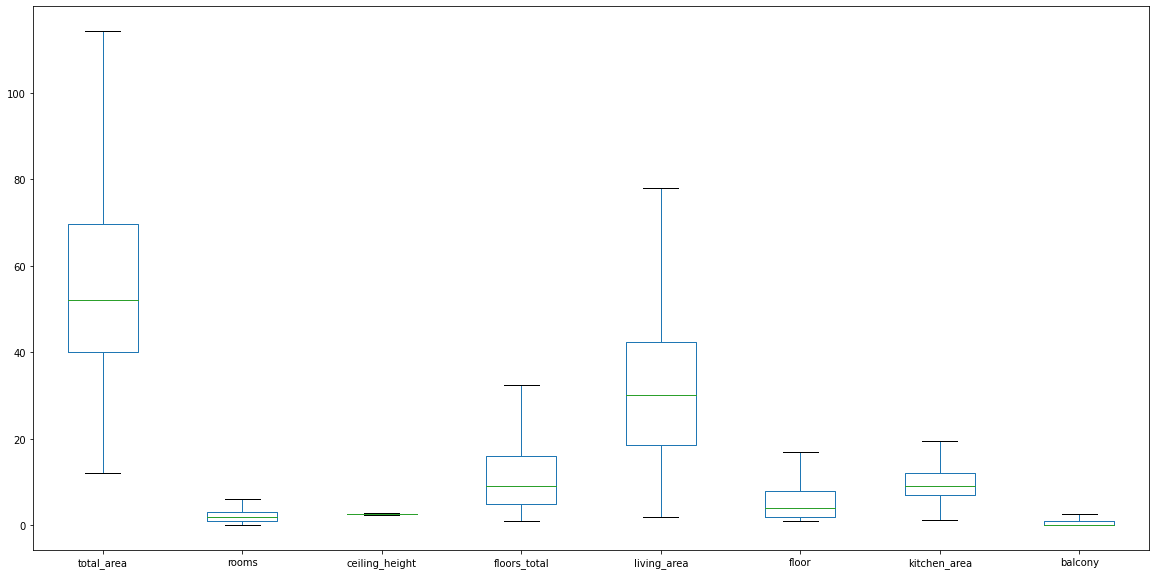

In [44]:
data.loc[:,'total_area':'balcony'].plot(kind='box', figsize=(20,10))

Отлично, выбросы были убраны)

# Промежуточный итог

По итогу, можно сказать, что большая часть работы успешно проделана: выбросы были устранены также, как и ошибки в данных, дубликаты, пропуски.

Их мы либо удаляли, либо заменяли. 
На данный момент, датафрейм готов к исследованию и получению каких-то выводов.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы:
- цена 1 кв.м
- день публикации
- месяц публикации
- год публикации
- тип этажа (первый, последний, другой)
- расстояние в км до центра города




In [45]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [46]:
# цена 1 кв м
data['price_per_sq_meter'] = round(data['last_price'] / data['total_area'],2)
#тк мы не можем привести series к int, то будем брать 2 знака после ,
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,109953.70
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,510.0,92785.71
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,2.5,234.0,424.0,103938.73
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [47]:
# день публикации
#data['first_day_exposition'].dt.weekday  # 0 -понедельник и т.д.
data['weekday_published'] = data['first_day_exposition'].dt.weekday

In [48]:
data['weekday_published'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [49]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,weekday_published
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,109953.70,3
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,510.0,92785.71,3
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,2.5,234.0,424.0,103938.73,4
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1


In [50]:
#месяц публикации
data['month_published'] = data['first_day_exposition'].dt.month

In [51]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,weekday_published,month_published
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,109953.70,3,3
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,510.0,92785.71,3,8
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,28098.0,6800.0,2.0,84.0,2.5,234.0,424.0,103938.73,4,7
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6


In [52]:
#год публикации
data['year_published'] = data['first_day_exposition'].dt.year

In [53]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,weekday_published,month_published,year_published
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,109953.70,3,3,2019
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,13933.0,1.0,90.0,2.0,574.0,510.0,92785.71,3,8,2015
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,6800.0,2.0,84.0,2.5,234.0,424.0,103938.73,4,7,2015
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [54]:
#тип этажа


#data['floor_type'] = data['floor']
#for c in data['floor']:
#    m = data['floors_total']
#    if c == 1:
#        data['floor_type'] = 'первый'
#    if c == m:
#        data['floor_type'] = 'последний'
#    else:
#        data['floor_type'] = 'другой'
#        
#data.head()  ---------------------------------------ошибка 

#тип этажа
data['floor_type'] = data['floor']
data['floor_type'] = data['floor_type'].where(data['floor_type'] != 1.0, 'первый')
data['floor_type'] = data['floor_type'].where(data['floor_type'] != data['floors_total'], 'последний')
data['floor_type'] = data['floor_type'].where((data['floor_type'] == 'первый') | (data['floor_type'] == 'последний'), 'другое')
data.head()
        
        

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,weekday_published,month_published,year_published,floor_type
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,1.0,482.0,2.0,755.0,NaN,109953.70,3,3,2019,другое
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,1.0,90.0,2.0,574.0,510.0,92785.71,3,8,2015,другое
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,2.0,84.0,2.5,234.0,424.0,103938.73,4,7,2015,другое
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другое


In [55]:
# расстояние до центра города в км
data['cityCenters_in_km'] = data['cityCenters_nearest'] // 1000
#data = data[pd.notnull(data['cityCenters_in_km'])]
#data['cityCenters_in_km'] = data['cityCenters_in_km'].astype(int)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,weekday_published,month_published,year_published,floor_type,cityCenters_in_km
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,482.0,2.0,755.0,NaN,109953.70,3,3,2019,другое,16.0
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,18.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,90.0,2.0,574.0,510.0,92785.71,3,8,2015,другое,13.0
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,84.0,2.5,234.0,424.0,103938.73,4,7,2015,другое,6.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другое,8.0


Новые столбцы были успешно добавлены

### Проведите исследовательский анализ данных

In [56]:
#выведем информацию о колонках
data.columns
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0  11875000.0      108.00           2019-03-07    3.0   
1           7.0   3350000.0       40.40           2018-12-04    1.0   
2          10.0   5196000.0       56.00           2015-08-20    2.0   
3           0.0  11875000.0      114.25           2015-07-24    3.0   
4           2.0  10000000.0      100.00           2018-06-19    2.0   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0    8.0         False  ...   
1            2.65          11.0         18.6    1.0         False  ...   
2            2.65           5.0         34.3    4.0         False  ...   
3            2.65          14.0          NaN    9.0         False  ...   
4            2.85          14.0         32.0   13.0         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0               2.0          755.0         

In [57]:
clmns = ['total_area','living_area', 'kitchen_area','last_price','rooms','ceiling_height','floor','floor_type','cityCenters_nearest','airports_nearest','parks_nearest','weekday_published','month_published']
d_analys = data[clmns]
print(d_analys.head())
d_analys.dtypes

   total_area  living_area  kitchen_area  last_price  rooms  ceiling_height  \
0      108.00         51.0          19.5  11875000.0    3.0            2.70   
1       40.40         18.6          11.0   3350000.0    1.0            2.65   
2       56.00         34.3           8.3   5196000.0    2.0            2.65   
3      114.25          NaN           NaN  11875000.0    3.0            2.65   
4      100.00         32.0          19.5  10000000.0    2.0            2.85   

   floor floor_type  cityCenters_nearest  airports_nearest  parks_nearest  \
0    8.0     другое              16028.0           18863.0          482.0   
1    1.0     первый              18603.0           12817.0            0.0   
2    4.0     другое              13933.0           21741.0           90.0   
3    9.0     другое               6800.0           28098.0           84.0   
4   13.0     другое               8098.0           31856.0          112.0   

   weekday_published  month_published  
0                  3  

total_area             float64
living_area            float64
kitchen_area           float64
last_price             float64
rooms                  float64
ceiling_height         float64
floor                  float64
floor_type              object
cityCenters_nearest    float64
airports_nearest       float64
parks_nearest          float64
weekday_published        int64
month_published          int64
dtype: object

Итак, для анализа были вынесены в отдельный датафрейм нужные для исследовательского анализа колонки, с которыми придется дальше работать (так будет удобнее выводить всю информацию о них)

# total_area

In [58]:
d_analys['total_area'].sort_values().unique()

array([ 12.  ,  13.  ,  13.2 , ..., 114.1 , 114.2 , 114.25])

Здесь квартиры начинаются от 12 и до 114 кв м, скорее всего те квартиры, что до 20 метров - это все маленькие студии в центральной части города в 3-х, 4-х этажных домах. А квартиры с большей площадью, либо новострой, либо привычная вторичка.

In [59]:
data.pivot_table(values = 'total_area', index = 'cityCenters_in_km', aggfunc = 'median')

,total_area
cityCenters_in_km,
0.0,95.900
1.0,85.100
2.0,86.200
3.0,79.500
4.0,82.000
5.0,77.100
6.0,67.935
7.0,64.870
8.0,59.000


<AxesSubplot:xlabel='Расстояние до центра в м.', ylabel='Общая площадь'>

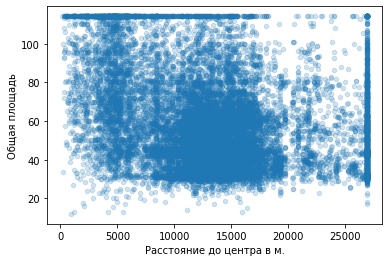

In [60]:
data.plot(kind = 'scatter', y = 'total_area', x = 'cityCenters_nearest', alpha = 0.2, xlabel = 'Расстояние до центра в м.', ylabel = 'Общая площадь')

На этих графиках видно, что мнение выше (по поводу студий) было относительно ошибочно. Самые маленькие квартиры, в основном, выставлены на продажу далеко от центра (10 - 20 км), а самые большие по площади как раз находятся в центре (4 км). Это как раз старая застройка и там преимущественно есть 3 или 4 комнатные квартиры.

# living_area

In [61]:
data['living_area'].sort_values().unique()

array([ 2.  ,  3.  ,  5.  , ..., 77.8 , 77.85,   nan])

<AxesSubplot:title={'center':'Жилая площадь'}, xlabel='Жилая площадь', ylabel='Кол-во квартир с такой жилой площадью'>

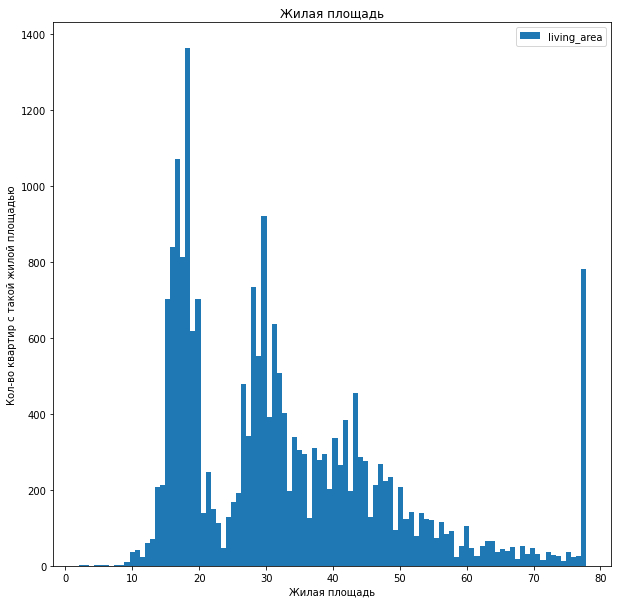

In [62]:
h4 = data.plot(kind = 'hist', title = 'Жилая площадь', y ='living_area', bins = 100, figsize = (10,10))
h4.set_xlabel('Жилая площадь')
h4.set_ylabel('Кол-во квартир с такой жилой площадью')
h4

В основном, жилая площадь составляет от 15 до 20 кв м, но тоже часто бывает и от 25 до 35, при том, что большая часть квартир 40 кв м. Вероятно, что площадь санузла около 5 кв м (в среднем) и/или отсутствует балкон в квартире.

# kitchen_area

In [63]:
data['kitchen_area'].sort_values().unique()

array([ 1.3 ,  2.  ,  2.3 ,  2.4 ,  2.89,  3.  ,  3.2 ,  3.3 ,  3.4 ,
        3.5 ,  3.7 ,  3.8 ,  4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,
        4.6 ,  4.7 ,  4.8 ,  4.9 ,  5.  ,  5.04,  5.06,  5.1 ,  5.14,
        5.2 ,  5.21,  5.23,  5.25,  5.28,  5.29,  5.3 ,  5.31,  5.33,
        5.35,  5.4 ,  5.42,  5.44,  5.47,  5.49,  5.5 ,  5.53,  5.59,
        5.6 ,  5.61,  5.62,  5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,
        5.78,  5.8 ,  5.82,  5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,
        6.03,  6.1 ,  6.16,  6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,
        6.26,  6.27,  6.28,  6.3 ,  6.31,  6.33,  6.35,  6.36,  6.37,
        6.4 ,  6.47,  6.5 ,  6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,
        6.7 ,  6.72,  6.73,  6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,
        6.86,  6.9 ,  6.91,  6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,
        7.09,  7.1 ,  7.12,  7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,
        7.36,  7.4 ,  7.41,  7.48,  7.5 ,  7.54,  7.6 ,  7.63,  7.65,
        7.7 ,  7.71,

<AxesSubplot:title={'center':'Площадь кухни'}, xlabel='Площадь кухни', ylabel='Кол-во квартир с такой площадью кухни'>

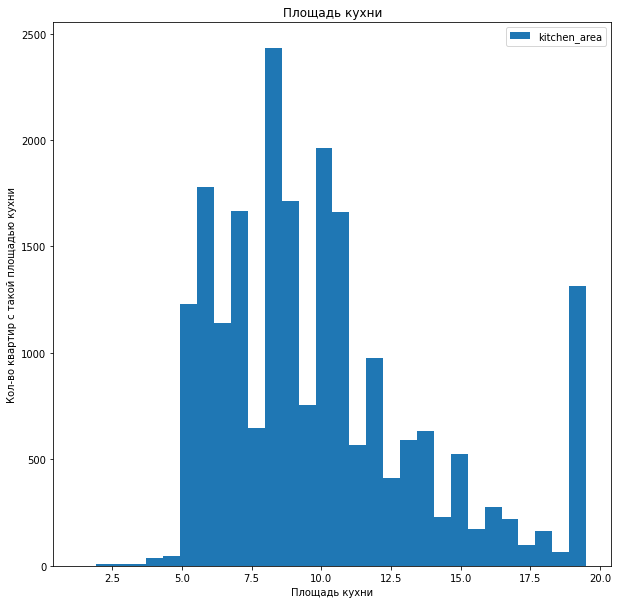

In [64]:
h3 = data.plot(kind = 'hist', title = 'Площадь кухни', y ='kitchen_area', bins = 30, figsize = (10,10))
h3.set_xlabel('Площадь кухни')
h3.set_ylabel('Кол-во квартир с такой площадью кухни')
h3

В среднем кухни от 6 до 11 кв.м - это норма, все в порядке.

# last_price

Тут уже будет интересно рассмотреть как влияет площадь на стоимость квартиры

<AxesSubplot:xlabel='общая площадь', ylabel='цена'>

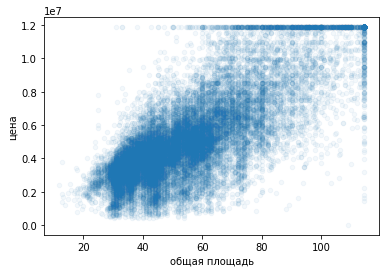

In [65]:
data.plot(kind = 'scatter', y = 'last_price', x = 'total_area', alpha = 0.05, xlabel = 'общая площадь', ylabel = 'цена')

<AxesSubplot:xlabel='цена', ylabel='кол-во комнат'>

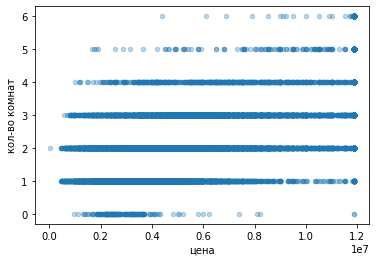

In [66]:
data.plot(kind = 'scatter', y = 'rooms', x = 'last_price', alpha = 0.3, xlabel = 'цена', ylabel = 'кол-во комнат')

Хорошо видно, что квартиры с маленькой площадью (1 - 3 комнатные квартиры) стоят ~ 3-5 млн. руб., в то время как квартиры с площадью от 80 кв. м. стоят уже больше 8 млн. руб.

# rooms

<AxesSubplot:title={'center':'Кол-во комнат'}, xlabel='Кол-во комнат в квартире', ylabel='Кол-во квартир с таким количеством комнат'>

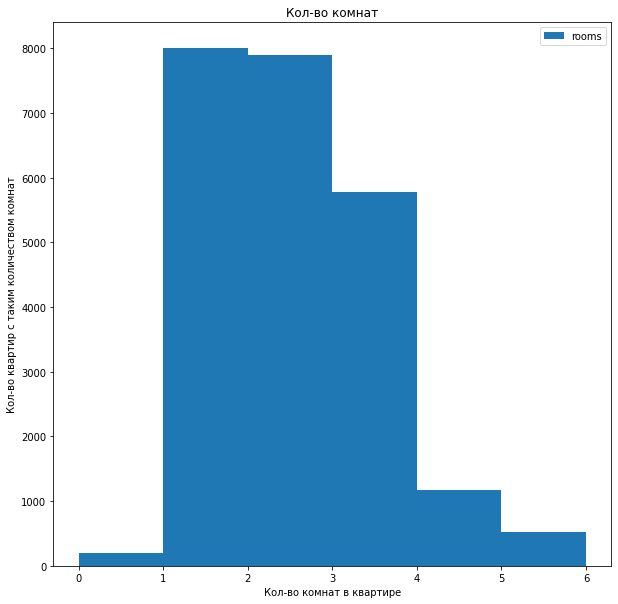

In [67]:
h2 =data.plot(kind = 'hist', title = 'Кол-во комнат', y ='rooms', bins = 6, figsize = (10,10))
h2.set_xlabel('Кол-во комнат в квартире')
h2.set_ylabel('Кол-во квартир с таким количеством комнат')
h2

85% квартир - от 1 до 4 комнат

# ceiling_height

<AxesSubplot:title={'center':'высота потолка'}, xlabel='высота потолка', ylabel='кол-во квартир с такой высотой потолков'>

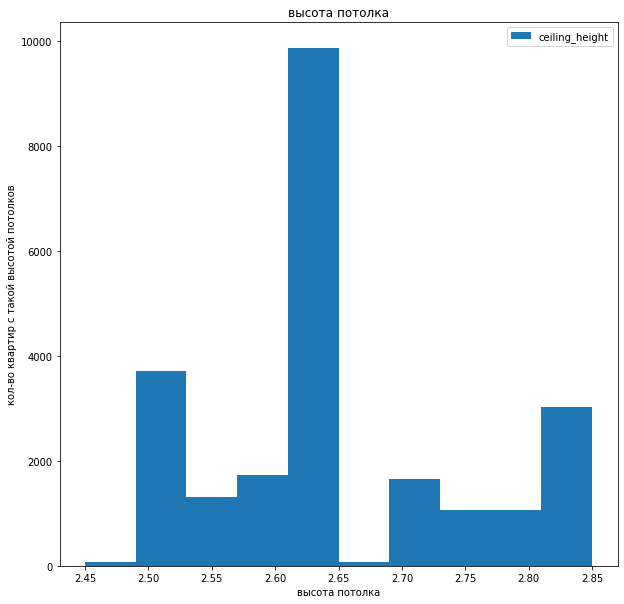

In [68]:
h1 = data.plot(kind = 'hist', title = 'высота потолка', y ='ceiling_height', bins = 10, figsize = (10,10))
h1.set_xlabel('высота потолка')
h1.set_ylabel('кол-во квартир с такой высотой потолков')
h1

Обычно потолки сейчас не делают ниже 2,4 м., что и видно на графике

# floor

<AxesSubplot:title={'center':'этаж'}, ylabel='Frequency'>

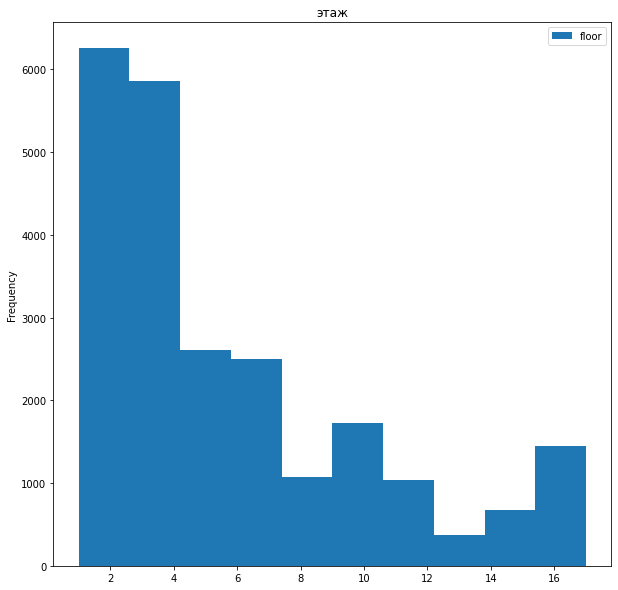

In [69]:
data.plot(kind = 'hist', title = 'этаж', y ='floor', bins = 10, figsize = (10,10))

# floor_type

<AxesSubplot:>

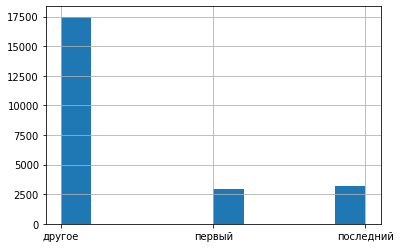

In [70]:
data['floor_type'].hist()

Очень мало квартир на первых и последних этажах - оно и понятно, так как многие дома высотки

# cityCenters_nearest

<AxesSubplot:title={'center':'Расстояние до центра города'}, ylabel='Frequency'>

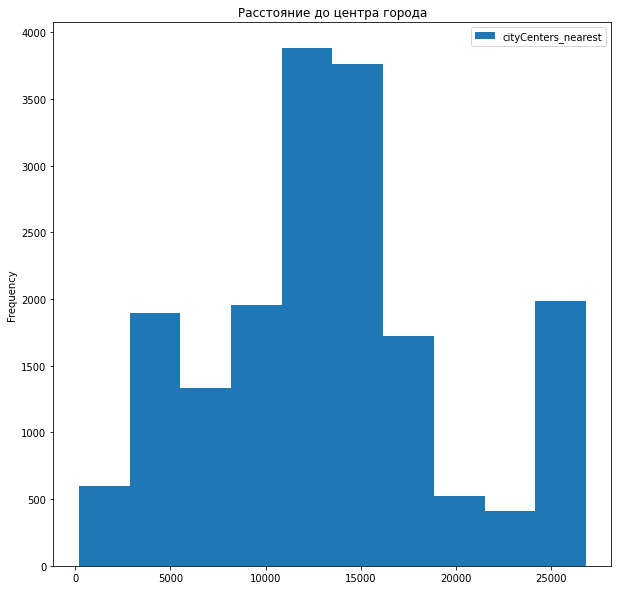

In [71]:
data.plot(kind = 'hist', title = 'Расстояние до центра города', y ='cityCenters_nearest', bins = 10, figsize = (10,10))

Основная часть квартир находятся на большом расстоянии от центра (10 - 18 км), это связано с тем, что большая часть продается в новостройках, а в настоящее время, центр города- это всё низкая застройка, и там попросту очень мало квартир. Поэтому и основная часть находится в отделении

# airports_nearest

<AxesSubplot:title={'center':'Расстояние до аэропорта'}, ylabel='Frequency'>

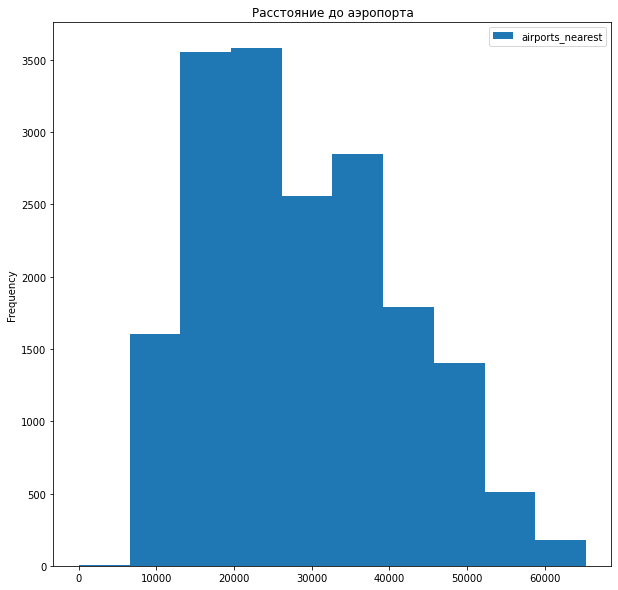

In [72]:
data.plot(kind = 'hist', title = 'Расстояние до аэропорта', y ='airports_nearest', bins = 10, figsize = (10,10))

Как и было сказано раннее, большая часть квартир на продаже находится на окраинах города, как раз аэропорт тоже загородом, поэтому и такое относительно "маленькое" расстояние до него. 

# parks_nearest

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

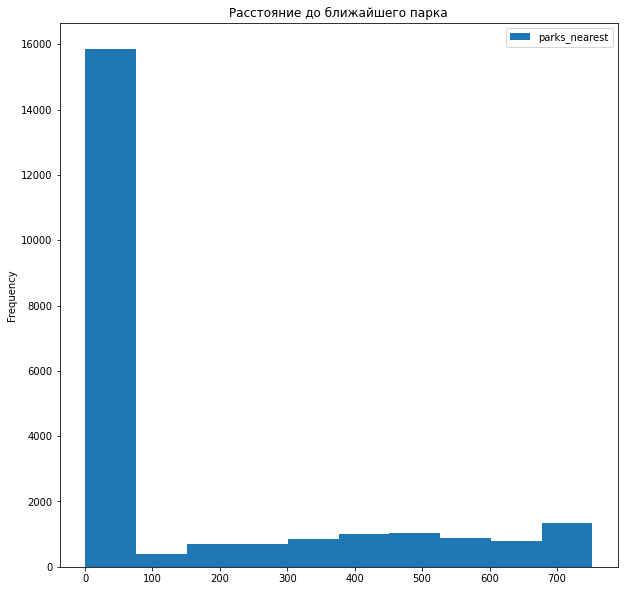

In [73]:
data.plot(kind = 'hist', title = 'Расстояние до ближайшего парка', y ='parks_nearest', bins = 10, figsize = (10,10))

Часто, прямо коло новых ЖК застройщики оставляют место и для парка, поэтому до них такое расстояние (от большего процента квартир) 

# weekday_published

<AxesSubplot:title={'center':'День публикации'}, ylabel='Frequency'>

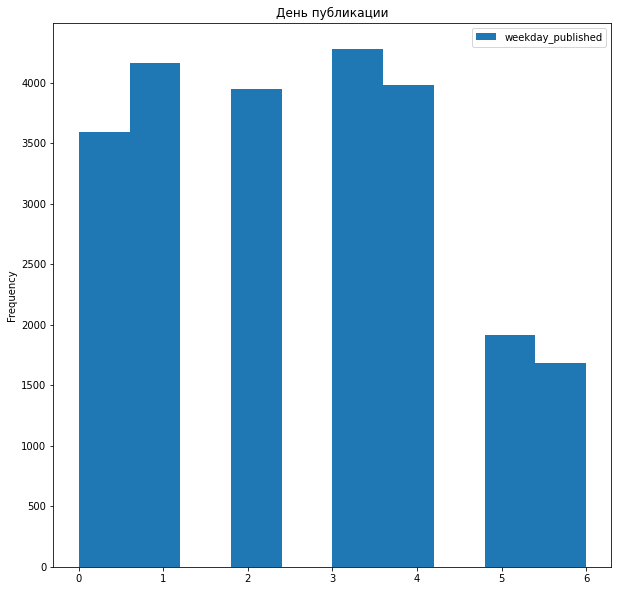

In [74]:
data.plot(kind = 'hist', title = 'День публикации', y ='weekday_published', bins = 10, figsize = (10,10))

Тут никакой зависимости, так как квартиры могут выставлять на продажу в любое время суток и в любой день (спасибо интернету)

# month_published

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

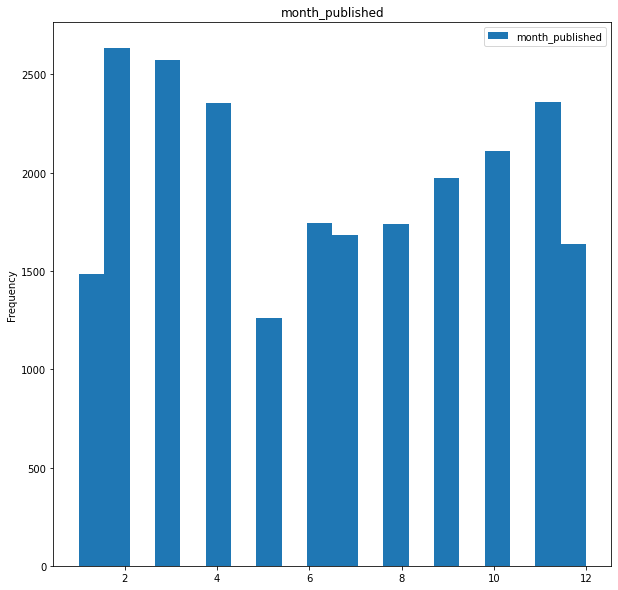

In [75]:
data.plot(kind = 'hist', title = 'month_published', y ='month_published', bins = 20, figsize = (10,10))
data['month_published'].unique()

Многие выставляют квартиры на продажу весь год, кроме лета. Может быть по причине отъезда на отдых с семьей и поэтому некогда заниматься продажами.

# Как быстро продавались квартиры?

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:ylabel='Frequency'>

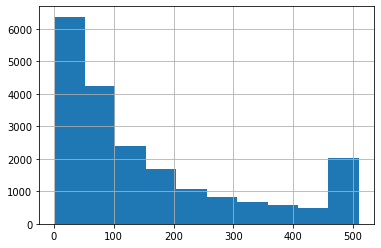

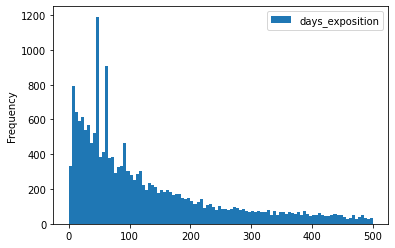

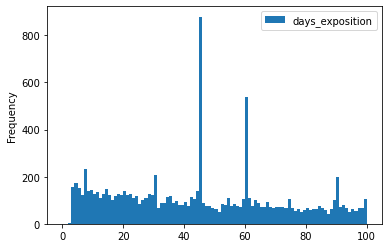

In [76]:
print(data['days_exposition'].hist())
print(data.plot(kind='hist', y='days_exposition', bins=100, range=(0,500)))
data.plot(kind='hist', y='days_exposition', bins=100, range=(0,100))

Многие квартиры продавались до 100 дней, но есть странные значения на 45 и 60 днях, дальше посмотрим, что это

In [77]:
data['days_exposition'].value_counts().head(50)

510.0    1673
45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
4.0       174
3.0       157
5.0       152
14.0      146
9.0       142
20.0      139
44.0      138
8.0       138
11.0      135
18.0      128
13.0      128
10.0      127
22.0      125
28.0      125
21.0      124
15.0      124
6.0       124
19.0      121
29.0      121
35.0      119
17.0      116
24.0      116
34.0      113
42.0      113
23.0      111
27.0      110
54.0      110
12.0      108
61.0      108
43.0      107
74.0      106
59.0      106
26.0      102
89.0      101
16.0      100
63.0       99
37.0       96
67.0       93
40.0       91
46.0       90
32.0       90
33.0       89
64.0       88
36.0       88
Name: days_exposition, dtype: int64

Да, похоже, что есть странные значения на 45, 60, 510, но тк мы ставили ограничение снизу и сверху, видимо, что те значения (крайние) сюда и прилетели

Попробуем рассмотреть данные, но не будем брать во внимание 510 дней, так как они сильно повлияют на общую статистику

In [78]:
data.loc[data['days_exposition'] <= 509, 'days_exposition'].describe()

count    18712.000000
mean       128.262131
std        121.023052
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

Итак, по этим данным можно сказать, что быстрая продажа - до первого квантиля, долгая - после третьего квантиля.

- 1...41 - быстро
- 42...181 - средне
- 182...510 - долгая

# Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Нужны характеристики:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количество комнат;
 - типа этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год);

Сравнение будет производиться с ценой

In [79]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sq_meter',
       'weekday_published', 'month_published', 'year_published', 'floor_type',
       'cityCenters_in_km'],
      dtype='object')

# total_area

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

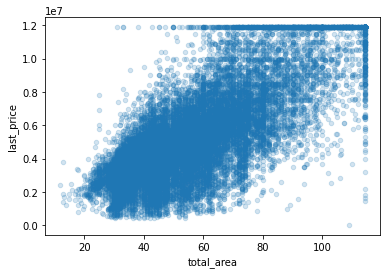

In [80]:
data.plot(kind = 'scatter', y = 'last_price', x = 'total_area', alpha = 0.2)

In [81]:
data['total_area'].corr(data['last_price'])

0.8114020176034986

После построения графиков и получения корреляции прослеживается сильная положительная зависимость. Оно и понятно, чем больше площадь квартиры, тем выше её стоимость. Следует еще учитывать многие другие факторы, но этот один из основных и поэтому, тенденция на зависимость остается

# living_area

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

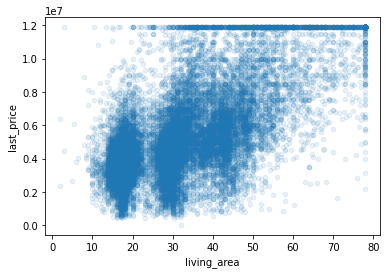

In [82]:
data.plot(kind = 'scatter', y = 'last_price', x = 'living_area', alpha = 0.1)

In [83]:
data['living_area'].corr(data['last_price'])

0.708632427179657

Тоже положительная линейная зависимость, чем выше жилая площадь, как и общая, тем выше стоимость квартиры

# kitchen_area

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

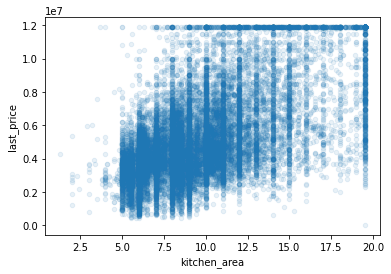

In [84]:
data.plot(kind = 'scatter', y = 'last_price', x = 'kitchen_area', alpha = 0.1)

In [85]:
data['kitchen_area'].corr(data['last_price'])

0.6407432828654371

Тут пока все очень просто - чем выше общая площадь, тем больше и жилая, и площадь кухни, соответственно и выше стоимость квартиры.

# rooms

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

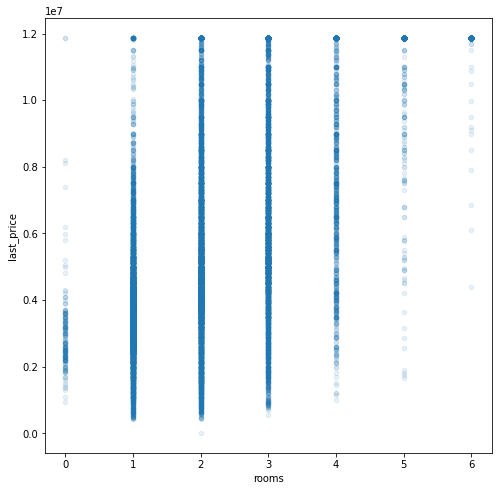

In [86]:
data.plot(kind = 'scatter', y = 'last_price', x = 'rooms', alpha = 0.1,figsize = (8,8))

In [87]:
data['rooms'].corr(data['last_price'])

0.5626941570584731

Тут уже меньше зависимость, т.к. некоторые квартиры с меньшем кол-вом комнат по площади могут быть больше остальных ( например 3к < 4к < 2к).

# floor_type

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

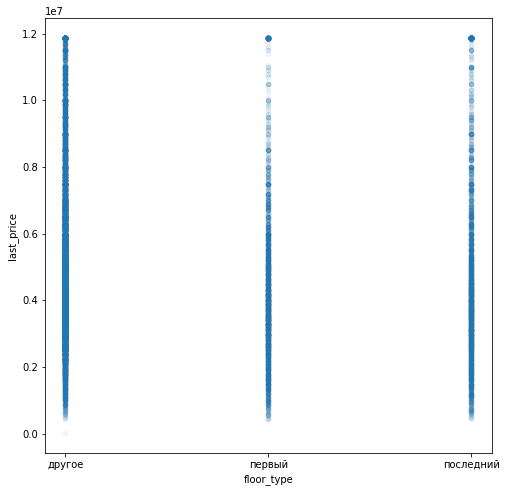

In [88]:
data.plot(kind = 'scatter', y = 'last_price', x = 'floor_type', alpha = 0.05,figsize = (8,8))

In [89]:
data['rooms'].corr(data['last_price'])

0.5626941570584731

Тут видно, что квартиры на первом этаже дешевле остальных, люди более охотно берут со 2-го и выше, даже на последнем.

По статистике из интернета лучшие этажи - (5-10), худший - первый, если конечно это не частный дом))

# weekday_published

<AxesSubplot:xlabel='weekday_published', ylabel='last_price'>

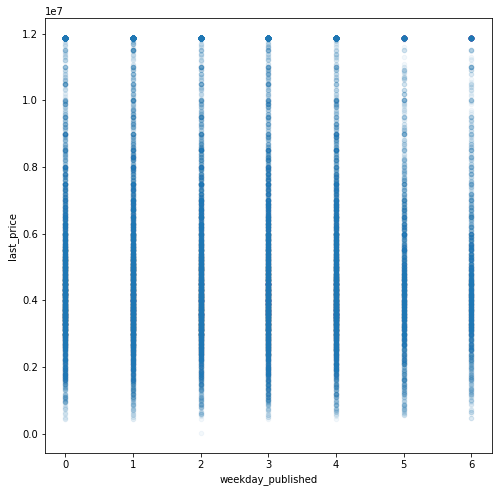

In [90]:
data.plot(kind = 'scatter', y = 'last_price', x = 'weekday_published', alpha = 0.05,figsize = (8,8))

<AxesSubplot:xlabel='weekday_published'>

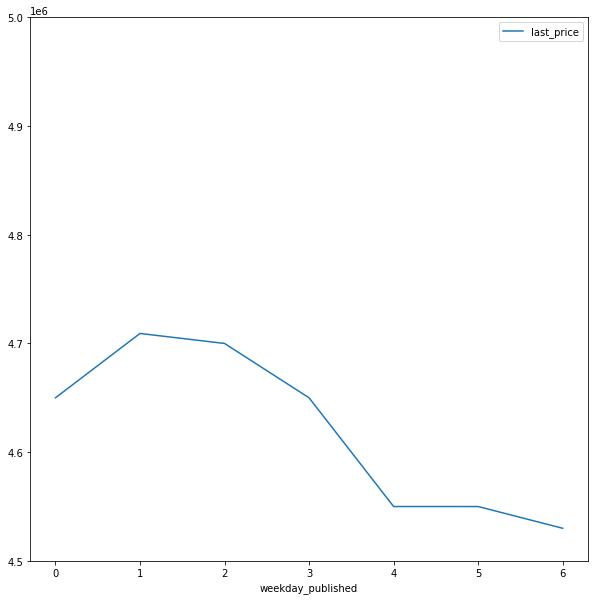

In [91]:
data.pivot_table(
    index='weekday_published', 
    values='last_price', 
    aggfunc=('median')).plot(
    y='last_price',
    figsize=(10,10),
    ylim=(4500000,5000000))

Тут нет особой зависимости, не будет же одна и та же квартира в понедельник стоить 5 млн, а на выходных 6 млн.

# month_published

<AxesSubplot:xlabel='month_published'>

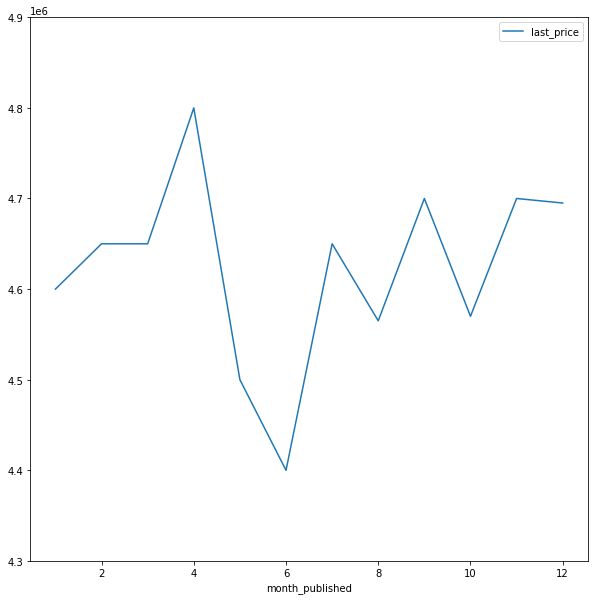

In [92]:
data.pivot_table(
    index='month_published', 
    values='last_price', 
    aggfunc=('median')).plot(
    y='last_price',
    figsize=(10,10),
    ylim=(4300000,4900000))

<AxesSubplot:>

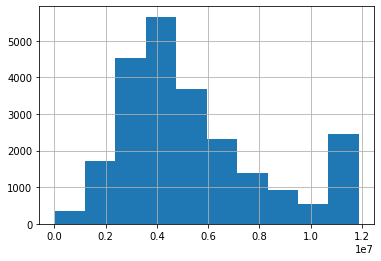

In [93]:
data['last_price'].hist()

In [94]:
data['month_published'].corr(data['last_price'])

0.004607666526924027

Самый сезон для покупки квартир - лето, а рост в апреле и сентябре. То же самое происходит и со съемными квартирами, самый "жаркий" сезон бывает в мае, июне, а подорожание начинается с осени и до весны

# year_published

<AxesSubplot:xlabel='Год продажи', ylabel='Стоимость в млн. руб.'>

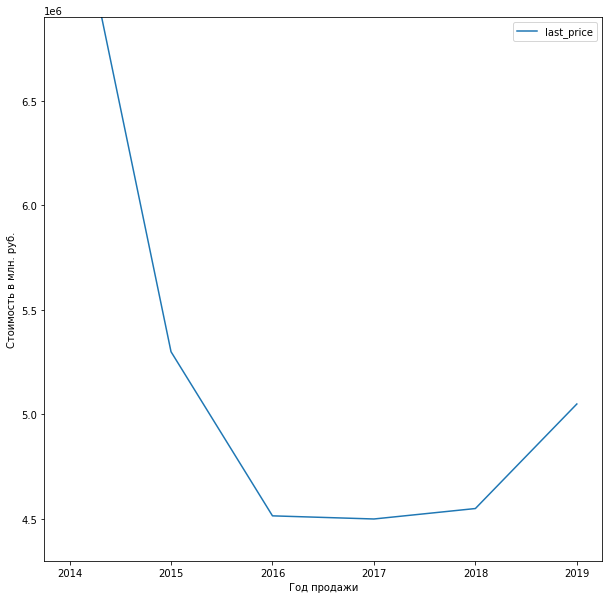

In [95]:
data.pivot_table(
    index='year_published', 
    values='last_price', 
    aggfunc=('median')).plot(
    y='last_price',
    figsize=(10,10),
    ylim=(4300000,6900000),
    xlabel = 'Год продажи',
    ylabel = 'Стоимость в млн. руб.')

По графику видно, что квартиры сильно начали дешеветь начиная с 2014 года и до 2017, а потом снова подскочили в цене.

# Промежуточный итог

Конечно, по всем графикам прослеживается зависимость. Большую роль играет площадь, кол-во комнат, этаж, местоположение квартиры в городе, но рассматривать эти данные по отдельности нельзя. Все потому, что все эти факторы вместе (какой-то в большей степени, какой-то в меньшей) влияют на общую стоимость квартиры.

# Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [96]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sq_meter',
       'weekday_published', 'month_published', 'year_published', 'floor_type',
       'cityCenters_in_km'],
      dtype='object')

In [97]:
#выведем в таблице населенные пункты с самым большим кол-вом объявлений
df_meter = data.pivot_table(index='locality_name', values=['price_per_sq_meter'], aggfunc=('count','mean'))
#переименуем столбцы
df_meter.columns = ['count', 'price_mean']

#получаем нужный срез через head
df_meter = df_meter.sort_values(by='count', ascending=False).head(10)
df_meter

,count,price_mean
locality_name,,
Санкт-Петербург,15643,107165.274930
посёлок Мурино,552,85629.568641
посёлок Шушары,439,78585.392847
Всеволожск,398,67907.917538
Пушкин,369,101205.063659
Колпино,338,75413.345385
посёлок Парголово,327,90267.474709
Гатчина,307,68779.668241
деревня Кудрово,299,92448.284849


<AxesSubplot:title={'center':'Топ-10 городов по кол-ву квартир'}, xlabel='Название населенного пункта', ylabel='Стоимость'>

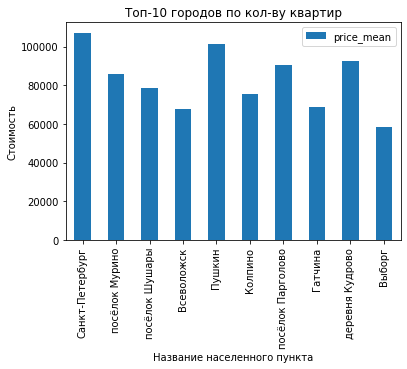

In [98]:
df_meter.plot(kind = 'bar', y = 'price_mean', title = 'Топ-10 городов по кол-ву квартир', xlabel = 'Название населенного пункта', ylabel = 'Стоимость')

По графику хорошо видно, как распределяется цена по разным населенным пунктам. Лидирует СПб с самой высокой средней ценой, но в Питере и больше всего объявлений (15.5 тыс.), в остальных 500 и ниже. Можно еще обратить внимание на Пушкин, с ценой почти как в СПб и Кудрово (Кудрово официально не входит в состав СПб, но многие считают, что это часть города, тк прилегает с востока вплотную). Дальше цена начинает падать.
Итог:
 - Самая высокая цена: СПб, Пушкин, Кудрово
 - Средняя цена: Мурино, Шушары, Колпино, Гатчина
 - Низкая цена: Всеволжск, Выборг (самая низкая)

# Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [99]:
#берем квартиры из СПб
df_2 = data.loc[data['locality_name'] == 'Санкт-Петербург']
df_2.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,weekday_published,month_published,year_published,floor_type,cityCenters_in_km
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,482.0,2.0,755.0,NaN,109953.70,3,3,2019,другое,16.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,90.0,2.0,574.0,510.0,92785.71,3,8,2015,другое,13.0
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,84.0,2.5,234.0,424.0,103938.73,4,7,2015,другое,6.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другое,8.0
7,5.0,7915000.0,71.60,2019-04-18,2.0,2.65,24.0,NaN,17.0,False,...,0.0,0.0,0.0,NaN,110544.69,3,4,2019,другое,11.0


In [100]:
print(df_2['cityCenters_in_km'].sort_values().unique())
df_2 = df_2.dropna(subset=['cityCenters_in_km'])
print(df_2['cityCenters_in_km'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]


Тут город не видно) , но они выбрались

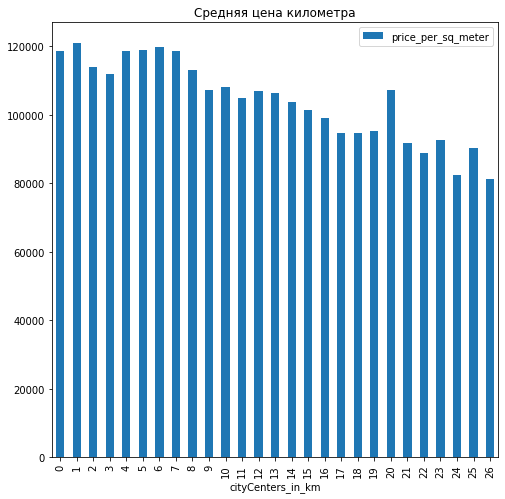

In [101]:
df_2['cityCenters_in_km'] = df_2['cityCenters_in_km'].astype(int)
df_2 = (df_2
        .pivot_table(
            index='cityCenters_in_km', 
            values='price_per_sq_meter', 
            aggfunc='mean').astype(int)
        .plot(
            kind='bar', 
            y='price_per_sq_meter', 
            figsize=(8,8), 
            title = 'Средняя цена километра')
       )


In [102]:
data['cityCenters_in_km'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., nan])

И так было понятно, что чем ближе к центру, тем выше стоимость за один километр.
Также видно, что есть некоторые необычные значения ( с 4 до 7 км) - цена не особо меняется.
Самое интересное, что разница в цене между 1 км и 26 км отличается на 35 тыс.руб.

### Общий вывод

Общий вывод:

Была проделана очень интересная работа с датафреймом, все задачи, описанные в условии, были выполнены, все данные и ошибки были устранены. Также были добавлены новые столбцы, характеристики, а по итогу проведен исследовательский анализ.


**Предобработка данных**:
 - Были обработаны все пропуска и неккоректные данные.
 - Были поменяны типы данных там, где это было нужно или возможно.
 - Были устранены дубликаты, как явные, так и неявные.
 - Выбросы были также убраны и заменены на пограничные значения для каждой характеристики.

**Новые столбцы:**
 Посчитаны и добавлены в таблицу:
 - цена одного квадратного метра
 - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
 - месяц публикации объявления
 - год публикации объявления
 - тип этажа квартиры (значения — «первый», «последний», «другой»)
 - расстояние в км до центра города

**Изучение параметров:**
 Были изучены и описаны следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
  
**Для каждого признака были построены графики или таблицы.**


**Этапы исследовательского анализа:**
  - Изучение различных факторов на скорость продажи квартиры.
  - Влияние различных параметров на общую стоимость квартиры.
  - Изучение средней стоимости кв.м. в топ-10 городов и поселков.
  - Расчет стоимости 1 км в зависимости от местоположения квартиры.
  
  
# Итог
 
 - По итогу проведенного исследования, можно сказать, что быстрой продаже считается продажа за 40 дней, средней от 40 до 180, а очень долгой от 180. На это сказывается огромное количество факторов.
 
 - Самую большую роль на формирование цены играет общая площадь квартиры, это как самый весомый фактор. Но также, не стоит забывать учитывать и другие важные параметры, такие как: кол-во комнат в квартире, этаж, местоположение (одна и та же квартира в центре и на окраине может отличаться в цене > чем в несколько раз), и т.д.. Но все эти факторы важны вкупе, и не всегда их можно рассматривать по-отдельности.
 
 - Самая высокая цена за кв.м. - это СПб и город Пушкин, в других городах/поселках цена не сильно отличается ( меньше на 10% - 20%), а цена в самых дешевых от СПб отличается на почти 35 тыс. руб. за кв.м. в среднем, что говорит о том, что Питер лидер по самой дорогой недвижимости.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод